In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas.util.testing as tm

C:\Users\sibin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#loading dataset
data1 = pd.read_csv(r"C:\Users\sibin\Desktop\udacity\greenvehicle\data\vehicle_08.csv")
data2 =pd.read_csv(r"C:\Users\sibin\Desktop\udacity\greenvehicle\data\vehicle_18.csv")

In [3]:
data1.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [4]:
data2.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


In [5]:
data1.info()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

In [6]:
#checking for duplicates in dataframe
print(data1.duplicated().sum())
print(data2.duplicated().sum())

25
0


In [7]:
# removing duplicates
data1.drop_duplicates(inplace = True)

In [8]:
data1.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [9]:
print(data1.duplicated().sum())
print(data2.duplicated().sum())

0
0


Hanling missing variables

In [10]:
mis1 = data1.isnull().sum()
mis1 = mis1.drop(mis1[mis1== 0].index).sort_values(ascending = False)[:30]
missing1 = pd.DataFrame({'Missing Value':mis1})
missing1

,Missing Value
Greenhouse Gas Score,180
Unadj Cmb MPG,180
Cmb MPG,180
Hwy MPG,180
City MPG,180
FE Calc Appr,180
Trans,180
Cyl,180
Drive,74


Text(0.5, 1.0, ' Missing Data by Featue')

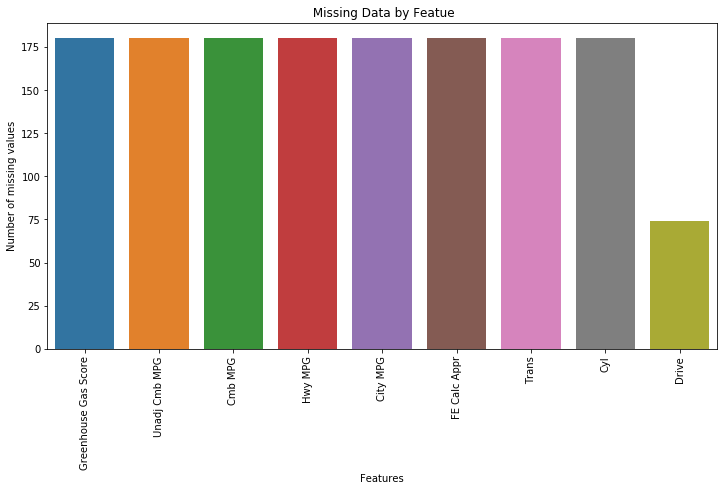

In [11]:
#ploting missing values

f, ax = plt.subplots(figsize = (12,6))
plt.xticks(rotation='90')

sns.barplot(x= mis1.index , y = mis1)

plt.xlabel('Features')
plt.ylabel('Number of missing values')
plt.title(" Missing Data by Featue")

In [12]:
mis2 = data2.isnull().sum()
mis2 = mis2.drop(mis2[mis2== 0].index).sort_values(ascending = False)[:30]
missing2 = pd.DataFrame({'Missing Value':mis2})

missing2

,Missing Value
Cyl,2
Displ,2


In [13]:
# droping unwanted columns 
data_08 = data1.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis =1)
data_18 = data2.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis =1)

In [14]:
# rename 2018 coloumn 'cert region' with 'sales region'
data_08 = data_08.rename(columns = {'Sales Area' : 'Cert_region'})
data_18 = data_18.rename(columns = {'Cert Region' : 'Cert_region'})

In [15]:
#For consistency, only compare cars certified by California standards.

data_08 = data_08.query('Cert_region == "CA"')
data_18 = data_18.query('Cert_region == "CA"')

Handling of missing values

In [16]:
# drop the rows that have a missing value, as the missing values are so less
data_08.dropna(inplace = True)
data_18.dropna(inplace = True)

In [17]:
data_18.isnull().sum()


Model                   0
Displ                   0
Cyl                     0
Trans                   0
Drive                   0
Fuel                    0
Cert_region             0
Veh Class               0
Air Pollution Score     0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Greenhouse Gas Score    0
SmartWay                0
dtype: int64

In [18]:
data_08['Cyl'].value_counts()

(6 cyl)     417
(4 cyl)     287
(8 cyl)     207
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: Cyl, dtype: int64

In [19]:
#extract the values, drop cyl from data
data_08['Cyl'] = data_08['Cyl'].str.extract('(\d+)').astype(int)

In [20]:
data_18['Cyl'] = data_18['Cyl'].astype(int)

In [21]:
data_18['Cyl'].value_counts()

4     366
6     247
8     154
3      18
12      9
5       2
16      1
Name: Cyl, dtype: int64

In [22]:
# airpollution score have a string value in order 6/4 , so we need to split that up as 
# so all vehicles with more than one fuel type, or hybrids
#will have a string that holds two values - one for each


In [23]:
data_08['Fuel'].value_counts()

Gasoline       1004
CNG               1
ethanol/gas       1
Name: Fuel, dtype: int64

In [24]:
data_18['Fuel'].value_counts()

Gasoline                740
Ethanol/Gas              26
Diesel                   19
Gasoline/Electricity     12
Name: Fuel, dtype: int64

In [25]:
hb_08 = data_08[data_08['Fuel'].str.contains('/')]
hb_08


,Model,Displ,Cyl,Trans,Drive,Fuel,Cert_region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,CA,small car,6/4,13/18,19/25,15/21,7/6,no


In [26]:
hb_18 = data_18[data_18['Fuel'].str.contains('/')]
hb_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert_region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,CA,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,CA,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,CA,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,CA,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,CA,large car,5,14/18,20/28,16/22,4,No


In [27]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()
df2 = hb_08.copy()

In [28]:
# columns to split by "/"

splitcol = ['Fuel', 'Air Pollution Score','City MPG','Hwy MPG' ,'Cmb MPG','Greenhouse Gas Score']

for c in splitcol:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [29]:
newrows = df2.append(df1)

In [30]:
# drop the original hybrid rows
data_08.drop(hb_08.index, inplace=True)

# add in our newly separated rows
data_08 = data_08.append(newrows, ignore_index=True)

In [31]:
df1.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert_region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,CA,small car,6,13,19,15,7,no


In [32]:
# create two copies of the 2008 hybrids dataframe
dfr1 = hb_18.copy()
dfr2 = hb_18.copy()

In [33]:
# columns to split by "/"

splitcolu = ['Fuel','City MPG','Hwy MPG' ,'Cmb MPG',  ]

for c in splitcolu:
    dfr1[c] = dfr1[c].apply(lambda x: x.split("/")[0])
    
    dfr2[c] = dfr2[c].apply(lambda x: x.split("/")[1])

In [34]:
dfr2.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert_region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Electricity,CA,small car,3,66,78,71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Electricity,CA,small car,7,70,75,72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Electricity,CA,small car,7,66,68,67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Electricity,CA,large car,3,62,68,64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Gas,CA,large car,5,18,28,22,4,No


In [35]:
newrows = dfr2.append(dfr1)

In [36]:
# drop the original hybrid rows
data_18.drop(hb_18.index, inplace=True)

# add in our newly separated rows
data_18 = data_18.append(newrows, ignore_index=True)

In [37]:
data_08['Airpollution Score'] = data_08['Air Pollution Score'].astype(float)
data_18['Air Pollution Score'] = data_18['Air Pollution Score'].astype(float)

Converting columns to desired data form 

In [38]:
mpg_col = ['City MPG', 'Hwy MPG' , 'Cmb MPG']

for c in mpg_col:
    data_08[c] = data_08[c].astype(float)
    data_18[c] = data_18[c].astype(float)

In [39]:
data_08['Greenhouse Gas Score'] = data_08['Greenhouse Gas Score'].astype(int)

Text(0.5, 1.0, 'Scatter')

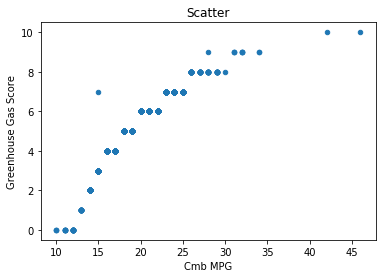

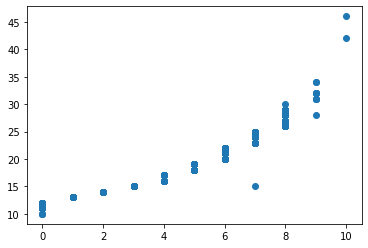

In [41]:
fig , ax = plt.subplots()
ax.scatter(data_08['Greenhouse Gas Score'], y = data_08['Cmb MPG'])


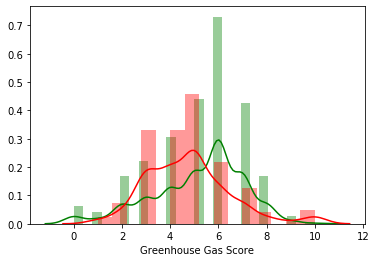

In [48]:
#data_08['Greenhouse Gas Score'].plot(kind = 'hist')
sns.distplot( data_08['Greenhouse Gas Score'], color = 'g')
sns.distplot( data_18['Greenhouse Gas Score'], color = 'r')
#data_08['Greenhouse Gas Score']